In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameter files

In [107]:
df_params = pd.read_csv("result_tables/OptimizationResults_simple_parameters.csv")
df_params['parameter_file'] = df_params['parameter_file'].str.replace('.txt', '').str.replace('Par0001', '')

# 4 categories of parameters tested
translation_rows = df_params[df_params['parameter_file'].str.contains('translation')]
affine_rows = df_params[df_params['parameter_file'].str.contains('affine')]
bspline16_rows = df_params[df_params['parameter_file'].str.contains('bspline16')]
bspline_rows = df_params[df_params['parameter_file'].str.contains('bspline')]
rigid_rows = df_params[df_params['parameter_file'].str.contains('rigid')]
basics = df_params.query("parameter_file in ['rigid', 'bspline16', 'affine', 'translation']")

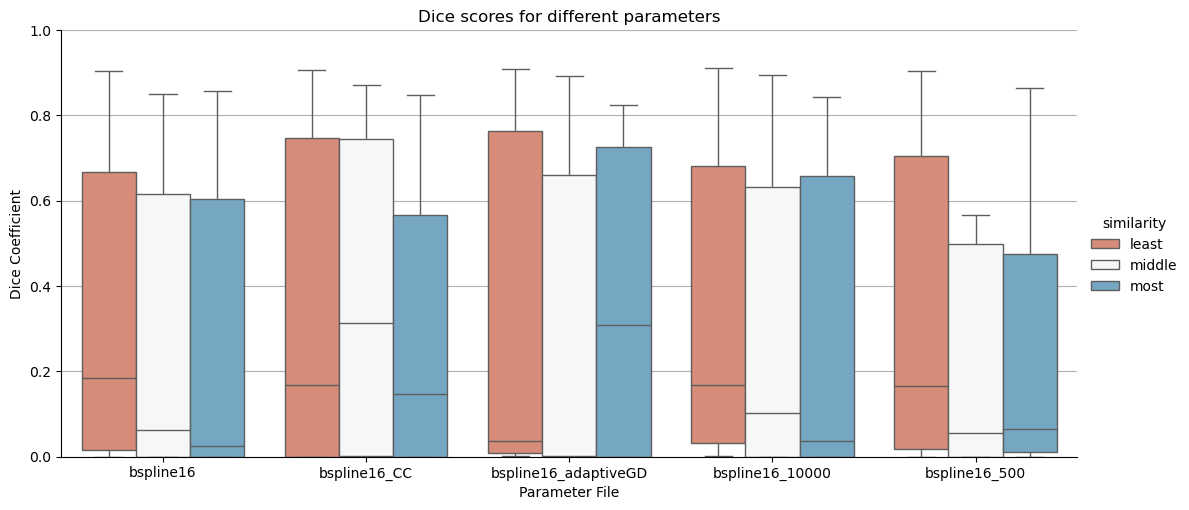

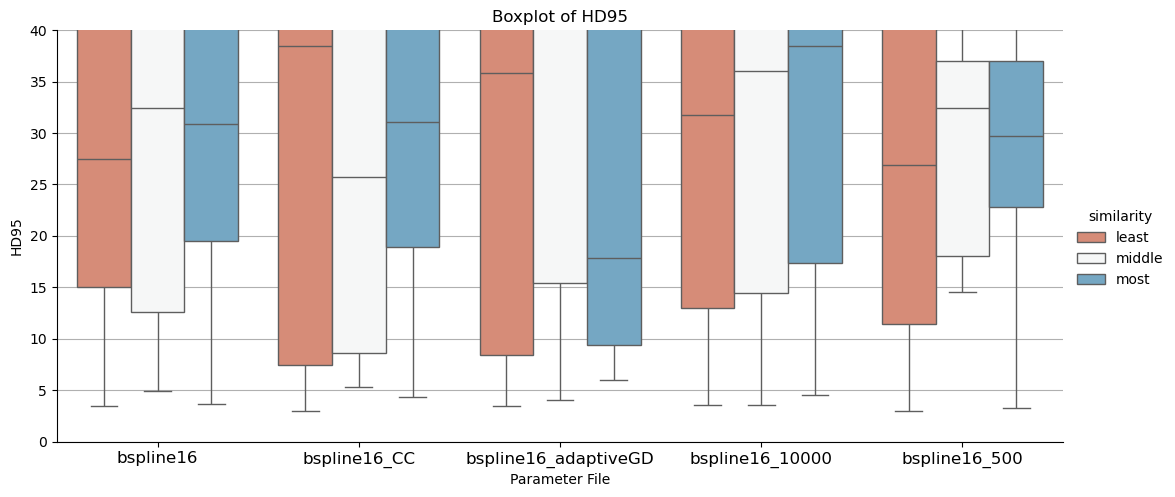

In [115]:
SELECT=2
data = [translation_rows, affine_rows, bspline16_rows,
        bspline_rows, rigid_rows, df_params, basics][SELECT]
if SELECT==6:
        sns.catplot(data=data, x='parameter_file', y='dice',
                hue='similarity', kind='box', height=5, aspect=1.5,
                palette='RdBu', order=['translation', 'rigid', 'affine', 'bspline16'])
else:
        sns.catplot(data=data, x='parameter_file', y='dice',
                hue='similarity', kind='box', height=5, aspect=2.2,
                palette='RdBu')
plt.title('Dice scores for different parameters')
plt.xlabel('Parameter File')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0, 1)
plt.xticks(fontsize=10)
plt.show()

sns.catplot(data=data, x='parameter_file', y='hd95',
            hue='similarity', kind='box', height=5, aspect=2.2,
            palette='RdBu')
plt.title('Boxplot of HD95')
plt.xlabel('Parameter File')
plt.ylabel('HD95')
plt.grid(axis='y')
plt.ylim(0, 40)
plt.xticks(fontsize=12)
plt.show()

In [110]:
summary_table_dsc = data.groupby(['parameter_file', 'similarity'])[
    'dice'].describe()
summary_table_dsc = summary_table_dsc.sort_values(by='mean', ascending=False)

summary_table_dsc = summary_table_dsc.pivot_table(index='parameter_file', columns='similarity', values=['mean', 'std'])
summary_table_dsc = summary_table_dsc.round(2)
summary_table_dsc

mean                std             
similarity             least middle  most least middle  most
parameter_file                                              
Par0043rigid            0.65   0.52  0.60  0.13   0.18  0.11
affine                  0.33   0.30  0.18  0.37   0.31  0.26
affine_10000e           0.35   0.33  0.19  0.36   0.32  0.27
affine_1res             0.33   0.27  0.23  0.36   0.30  0.27
affine_500              0.35   0.29  0.21  0.37   0.30  0.26
affine_8res             0.32   0.23  0.31  0.34   0.31  0.29
affine_CC               0.29   0.41  0.27  0.36   0.32  0.31
affine_adaptiveGD       0.35   0.23  0.20  0.37   0.30  0.28
bspline04               0.32   0.22  0.26  0.35   0.25  0.33
bspline08               0.34   0.29  0.28  0.38   0.33  0.35
bspline16               0.34   0.30  0.28  0.38   0.36  0.36
bspline16_10000         0.34   0.31  0.30  0.38   0.36  0.36
bspline16_500           0.33   0.21  0.27  0.38   0.25  0.32
bspline16_CC            0.35   0.37  0.30  0.39   0.39  0.34
bspline16_adaptiveGD    0.34   0.29  0.36  0.41   0.36  0.37
bspline32               0.33   0.29  0.27  0.38   0.36  0.34
bspline64               0.33   0.28  0.26  0.37   0.34  0.33
rigid                   0.47   0.31  0.31  0.31   0.30  0.32
translation             0.64   0.49  0.58  0.13   0.24  0.11
translation_10000       0.64   0.53  0.58  0.14   0.21  0.11
translation_1res        0.64   0.43  0.58  0.14   0.25  0.11
translation_500         0.64   0.51  0.58  0.14   0.24  0.11
translation_8res        0.64   0.43  0.58  0.14   0.25  0.11
translation_CC          0.65   0.54  0.61  0.14   0.16  0.10
translation_adaptiveGD  0.64   0.50  0.58  0.14   0.24  0.11

In [26]:
summary_table_hd95 = data.groupby(['parameter_file', 'similarity'])[
    'hd95'].describe()
summary_table_hd95 = summary_table_hd95.sort_values(by='mean', ascending=True)

summary_table_hd95 = summary_table_hd95.pivot_table(
    index='parameter_file', columns='similarity', values=['mean', 'std'])
summary_table_hd95 = summary_table_hd95.round(2)
summary_table_hd95

mean                 std             
similarity              least middle   most least middle  most
parameter_file                                                
translation             12.01  18.40  12.98  5.78   8.52  5.69
translation_10000       11.83  17.28  13.39  5.91   8.39  5.58
translation_1res        11.91  20.13  13.84  5.85   7.91  6.04
translation_500         11.83  17.98  13.44  5.91   8.76  5.43
translation_8res        11.91  20.13  13.84  5.85   7.91  6.04
translation_CC          11.84  17.02  12.15  5.87   7.30  6.08
translation_adaptiveGD  11.92  18.35  13.78  6.17   8.58  6.37

In [6]:
# Write to latex format
summary_table_modified_latex = summary_table_dsc.to_latex(
    column_format='cccccc', multirow=True, multicolumn_format='c')
print(summary_table_modified_latex)

\begin{tabular}{cccccc}
\toprule
 & \multicolumn{3}{c}{mean} & \multicolumn{3}{c}{std} \\
similarity & least & middle & most & least & middle & most \\
parameter_file &  &  &  &  &  &  \\
\midrule
translation & 0.640000 & 0.490000 & 0.580000 & 0.130000 & 0.240000 & 0.110000 \\
translation_10000 & 0.640000 & 0.530000 & 0.580000 & 0.140000 & 0.210000 & 0.110000 \\
translation_1res & 0.640000 & 0.430000 & 0.580000 & 0.140000 & 0.250000 & 0.110000 \\
translation_500 & 0.640000 & 0.510000 & 0.580000 & 0.140000 & 0.240000 & 0.110000 \\
translation_8res & 0.640000 & 0.430000 & 0.580000 & 0.140000 & 0.250000 & 0.110000 \\
translation_CC & 0.650000 & 0.540000 & 0.610000 & 0.140000 & 0.160000 & 0.100000 \\
translation_adaptiveGD & 0.640000 & 0.500000 & 0.580000 & 0.140000 & 0.240000 & 0.110000 \\
\bottomrule
\end{tabular}



In [30]:
summary_table_dsc = data.groupby(['parameter_file', 'similarity'])[
    'dice'].describe()
summary_table_dsc = summary_table_dsc.sort_values(by='mean', ascending=False)
summary_table_dsc

count      mean       std       min       25%  \
parameter_file similarity                                                  
translation    least        12.0  0.637824  0.133366  0.364726  0.585988   
               most         12.0  0.584816  0.105623  0.382801  0.539776   
               middle       12.0  0.494354  0.237924  0.028414  0.337836   
rigid          least        12.0  0.471865  0.311395  0.000000  0.258555   
bspline16      least        12.0  0.337168  0.381705  0.000097  0.014753   
affine         least        12.0  0.334552  0.366671  0.000000  0.000000   
rigid          most         12.0  0.313843  0.319661  0.000000  0.000008   
               middle       12.0  0.309560  0.302630  0.000000  0.000016   
bspline16      middle       12.0  0.301905  0.359974  0.000000  0.000000   
affine         middle       12.0  0.295303  0.310828  0.000000  0.000000   
bspline16      most         12.0  0.283054  0.356303  0.000000  0.000097   
affine         most         12.0  0.183596  0.258819  0.000000  0.000000   

                                50%       75%       max  
parameter_file similarity                                
translation    least       0.674219  0.721276  0.794977  
               most        0.593470  0.627116  0.789993  
               middle      0.595441  0.643872  0.754985  
rigid          least       0.541944  0.726080  0.817160  
bspline16      least       0.185370  0.667200  0.904555  
affine         least       0.177973  0.645323  0.848093  
rigid          most        0.262382  0.610420  0.816467  
               middle      0.279997  0.570292  0.793515  
bspline16      middle      0.062536  0.616256  0.849952  
affine         middle      0.198754  0.558906  0.769473  
bspline16      most        0.024786  0.603221  0.857843  
affine         most        0.005562  0.320525  0.804145

# Multi-step

In [113]:
df_params_multi = pd.read_csv("result_tables/OptimizationResults_multistep_parameters.csv")
df_params_multi['parameter_file'] = df_params_multi['parameter_file'].str.replace('.txt', '').str.replace('Par0001', '').str.replace('[', '').str.replace(']', '').str.replace("'", '').str.replace(", ", ' + ').str.replace("_CC", '_NC')
df_params_multi

,parameter_file,target,atlas,similarity,dice,hd,hd95,recall,fpr,fnr
0,translation + affine + bspline16,p128,p120,least,0.895411,18.338318,4.026470,0.882754,0.005612,0.117246
1,translation + affine + bspline16,p128,p108,middle,0.888873,13.147375,3.692705,0.859357,0.004886,0.140643
2,translation + affine + bspline16,p128,p107,most,0.836728,22.278248,6.253050,0.833332,0.009785,0.166668
3,translation + affine + bspline16,p127,p120,least,0.652194,13.602893,8.976941,0.575305,0.006924,0.424695
4,translation + affine + bspline16,p127,p108,middle,0.254065,29.210428,21.910284,0.191141,0.017737,0.808859
...,...,...,...,...,...,...,...,...,...,...
211,translation + affine,p107,p128,middle,0.740165,13.502884,5.189352,0.677877,0.004833,0.322123
212,translation + affine,p107,p115,most,0.737859,13.441031,5.208507,0.776156,0.007698,0.223844
213,translation + affine,p102,p128,least,0.557828,25.790020,14.810255,0.458615,0.008400,0.541385
214,translation + affine,p102,p127,middle,0.737040,18.033083,6.097553,0.641832,0.003900,0.358168


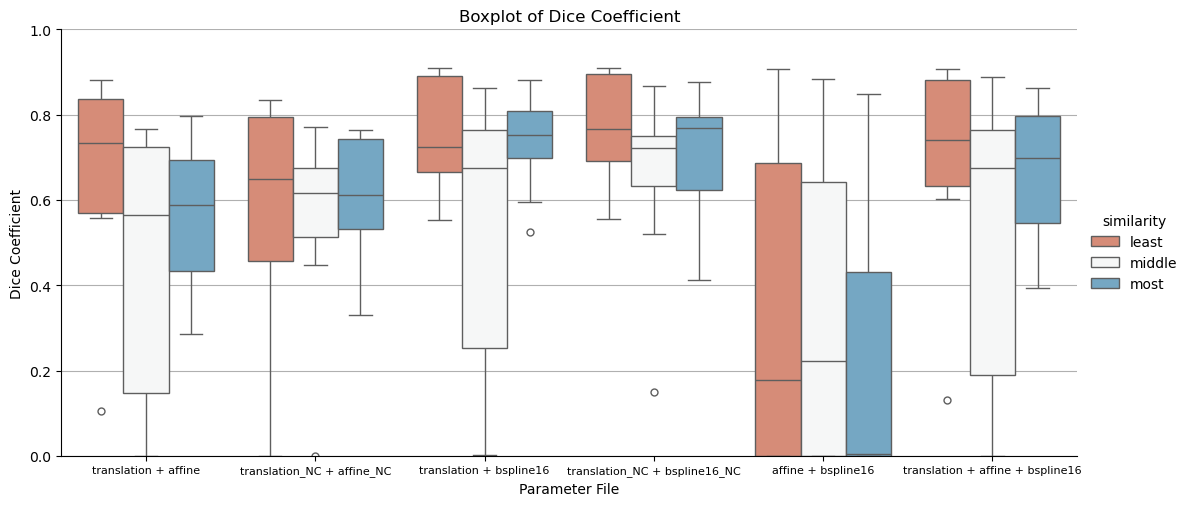

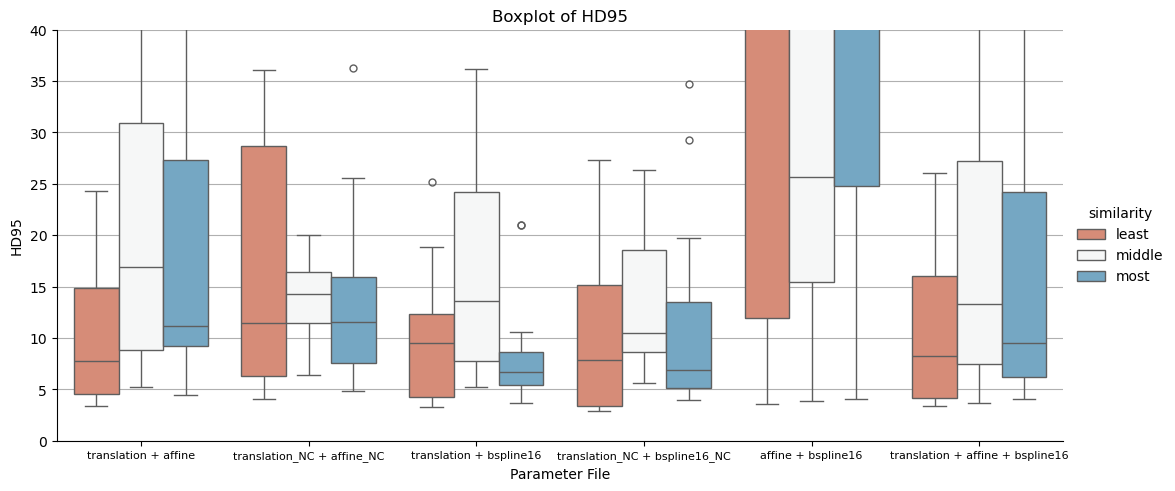

In [114]:
sns.catplot(data=df_params_multi, x='parameter_file', y='dice',
            hue='similarity', kind='box', height=5, aspect=2.2,
            palette='RdBu', order=['translation + affine', 'translation_NC + affine_NC',
                                   'translation + bspline16', 'translation_NC + bspline16_NC',
                                   'affine + bspline16', 'translation + affine + bspline16',])
plt.title('Boxplot of Dice Coefficient')
plt.xlabel('Parameter File')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0, 1)
plt.xticks(fontsize=8)
plt.show()

sns.catplot(data=df_params_multi, x='parameter_file', y='hd95',
            hue='similarity', kind='box', height=5, aspect=2.2,
            palette='RdBu', order=['translation + affine', 'translation_NC + affine_NC',
                                   'translation + bspline16', 'translation_NC + bspline16_NC',
                                   'affine + bspline16', 'translation + affine + bspline16',])
plt.title('Boxplot of HD95')
plt.xlabel('Parameter File')
plt.ylabel('HD95')
plt.grid(axis='y')
plt.ylim(0, 40)
plt.xticks(fontsize=8)
plt.show()

In [34]:
summary_table_dsc = df_params_multi.groupby(['parameter_file', 'similarity'])[
    'dice'].describe()
summary_table_dsc = summary_table_dsc.sort_values(by='mean', ascending=False)

summary_table_dsc = summary_table_dsc.pivot_table(index='parameter_file', columns='similarity', values=['mean', 'std'])
summary_table_dsc = summary_table_dsc.round(2)
summary_table_dsc

mean                std             
similarity                   least middle  most least middle  most
parameter_file                                                    
affine+bspline16              0.36   0.34  0.22  0.39   0.35  0.30
translation+affine            0.67   0.46  0.57  0.22   0.32  0.17
translation+affine+bspline16  0.71   0.51  0.67  0.22   0.35  0.17
translation+bspline16         0.75   0.53  0.74  0.12   0.32  0.11
translation_CC+affine_CC      0.55   0.56  0.61  0.31   0.20  0.14
translation_CC+bspline16_CC   0.77   0.66  0.72  0.12   0.18  0.14

In [35]:
summary_table_hd95 = df_params_multi.groupby(['parameter_file', 'similarity'])[
    'hd95'].describe()
summary_table_hd95 = summary_table_hd95.sort_values(by='mean', ascending=True)

summary_table_hd95 = summary_table_hd95.pivot_table(
    index='parameter_file', columns='similarity', values=['mean', 'std'])
summary_table_hd95 = summary_table_hd95#.round(2)
summary_table_hd95

mean                              \
similarity                           least        middle          most   
parameter_file                                                           
affine+bspline16              6.148914e+18  1.537229e+18  6.148914e+18   
translation+affine            1.266885e+01  2.283015e+01  1.673225e+01   
translation+affine+bspline16  1.289019e+01  2.112647e+01  1.483272e+01   
translation+bspline16         1.001066e+01  1.717785e+01  8.769552e+00   
translation_CC+affine_CC      3.074457e+18  1.537229e+18  1.383937e+01   
translation_CC+bspline16_CC   1.065975e+01  1.484806e+01  1.181670e+01   

                                       std                              
similarity                           least        middle          most  
parameter_file                                                          
affine+bspline16              9.082548e+18  5.325116e+18  9.082548e+18  
translation+affine            1.217251e+01  1.825970e+01  1.192897e+01  
translation+affine+bspline16  1.236247e+01  1.877434e+01  1.263577e+01  
translation+bspline16         6.845662e+00  1.154341e+01  6.029540e+00  
translation_CC+affine_CC      7.180385e+18  5.325116e+18  9.443211e+00  
translation_CC+bspline16_CC   8.559269e+00  1.026824e+01  1.041465e+01

In [36]:
summary_table_modified_latex = summary_table_dsc.to_latex(
    column_format='cccccc', multirow=True, multicolumn_format='c')
print(summary_table_modified_latex)

\begin{tabular}{cccccc}
\toprule
 & \multicolumn{3}{c}{mean} & \multicolumn{3}{c}{std} \\
similarity & least & middle & most & least & middle & most \\
parameter_file &  &  &  &  &  &  \\
\midrule
affine+bspline16 & 0.360000 & 0.340000 & 0.220000 & 0.390000 & 0.350000 & 0.300000 \\
translation+affine & 0.670000 & 0.460000 & 0.570000 & 0.220000 & 0.320000 & 0.170000 \\
translation+affine+bspline16 & 0.710000 & 0.510000 & 0.670000 & 0.220000 & 0.350000 & 0.170000 \\
translation+bspline16 & 0.750000 & 0.530000 & 0.740000 & 0.120000 & 0.320000 & 0.110000 \\
translation_CC+affine_CC & 0.550000 & 0.560000 & 0.610000 & 0.310000 & 0.200000 & 0.140000 \\
translation_CC+bspline16_CC & 0.770000 & 0.660000 & 0.720000 & 0.120000 & 0.180000 & 0.140000 \\
\bottomrule
\end{tabular}



# Fusion

In [57]:
df_fusion_MI = pd.read_csv("result_tables/OptimizationResults_FusionMethods_['Par0001translation.txt', 'Par0001bspline16.txt'].csv")
df_fusion_MI['parameter_file'] = df_fusion_MI['parameter_file'].str.replace('.txt', '').str.replace('Par0001', '')
df_fusion_NCC = pd.read_csv("result_tables/OptimizationResults_FusionMethods_['Par0001translation_CC.txt', 'Par0001bspline16_CC.txt'].csv")
df_fusion_NCC['parameter_file'] = df_fusion_NCC['parameter_file'].str.replace('.txt', '').str.replace('Par0001', '')

df_fusion_MI
# df_fusion_NCC

,parameter_file,target,atlas,dice,hd,hd95,recall,fpr,fnr,fusion_method,NrOfAtlases,similarity
0,"['translation', 'bspline16']",p128,p107,0.844925,19.537230,5.730771,0.860324,0.010375,0.139676,NaN,NaN,NaN
1,"['translation', 'bspline16']",p128,p115,0.001296,35.327702,29.089397,0.002509,0.058788,0.997491,NaN,NaN,NaN
2,"['translation', 'bspline16']",p128,p127,0.729142,17.671839,7.975250,0.839439,0.021449,0.160561,NaN,NaN,NaN
3,"['translation', 'bspline16']",p128,p119,0.875082,17.230116,6.023786,0.813901,0.003324,0.186099,NaN,NaN,NaN
4,"['translation', 'bspline16']",p128,p125,0.876125,14.023423,4.738954,0.905813,0.009245,0.094187,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
919,"['translation', 'bspline16']",p102,fused_atlas,0.613044,21.367493,13.575443,0.443057,0.000159,0.556943,STAPLE,9.0,least
920,"['translation', 'bspline16']",p102,fused_atlas,0.634326,22.514706,11.235085,0.465543,0.000145,0.534457,STAPLE,10.0,most
921,"['translation', 'bspline16']",p102,fused_atlas,0.612337,21.367493,13.601890,0.442308,0.000157,0.557692,STAPLE,10.0,least
922,"['translation', 'bspline16']",p102,fused_atlas,0.601307,22.514706,13.879511,0.430814,0.000145,0.569186,STAPLE,11.0,most


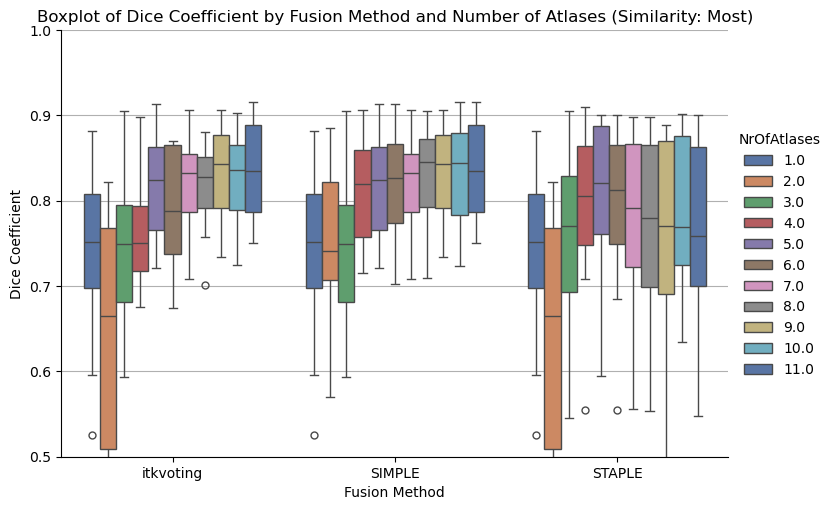

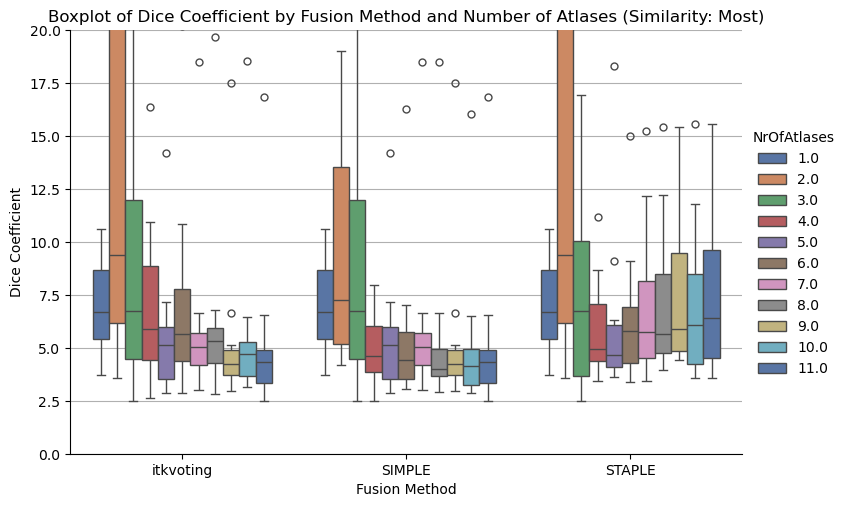

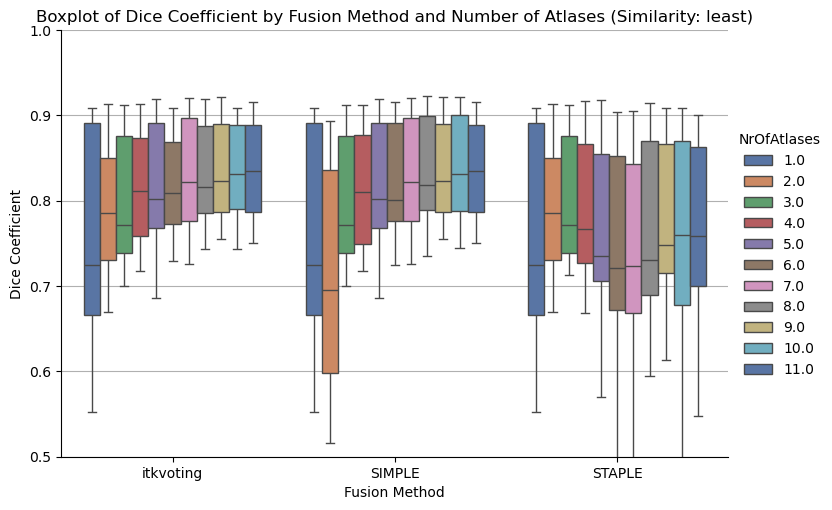

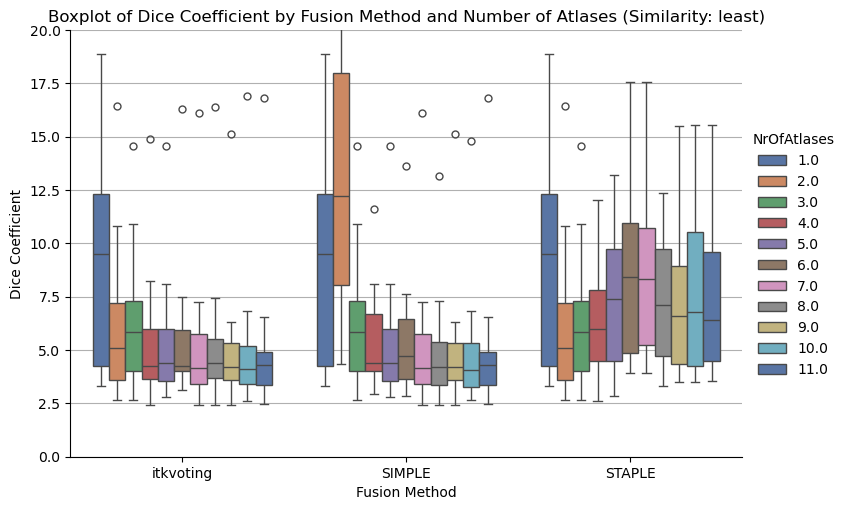

In [58]:
# Mutual Information
sns.catplot(data=df_fusion_MI[df_fusion_MI["similarity"] == "most"], x='fusion_method', y='dice',
            hue='NrOfAtlases', kind='box', height=5, aspect=1.5,
            palette='deep')
plt.title('Boxplot of Dice Coefficient by Fusion Method and Number of Atlases (Similarity: Most)')
plt.xlabel('Fusion Method')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0.5, 1)
plt.show()
sns.catplot(data=df_fusion_MI[df_fusion_MI["similarity"] == "most"], x='fusion_method', y='hd95',
            hue='NrOfAtlases', kind='box', height=5, aspect=1.5,
            palette='deep')
plt.title('Boxplot of Dice Coefficient by Fusion Method and Number of Atlases (Similarity: Most)')
plt.xlabel('Fusion Method')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0, 20)
plt.show()
sns.catplot(data=df_fusion_MI[df_fusion_MI["similarity"] == "least"], x='fusion_method', y='dice',
            hue='NrOfAtlases', kind='box', height=5, aspect=1.5,
            palette='deep')
plt.title('Boxplot of Dice Coefficient by Fusion Method and Number of Atlases (Similarity: least)')
plt.xlabel('Fusion Method')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0.5, 1)
plt.show()
sns.catplot(data=df_fusion_MI[df_fusion_MI["similarity"] == "least"], x='fusion_method', y='hd95',
            hue='NrOfAtlases', kind='box', height=5, aspect=1.5,
            palette='deep')
plt.title('Boxplot of Dice Coefficient by Fusion Method and Number of Atlases (Similarity: least)')
plt.xlabel('Fusion Method')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0, 20)
plt.show()

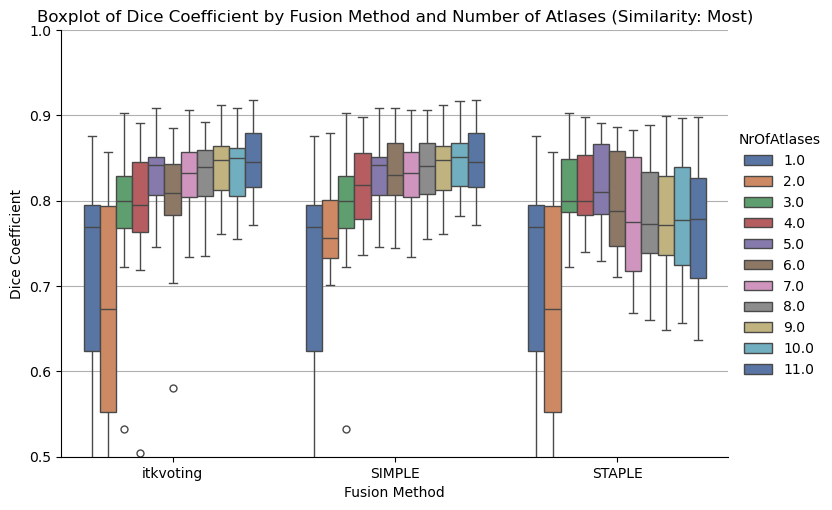

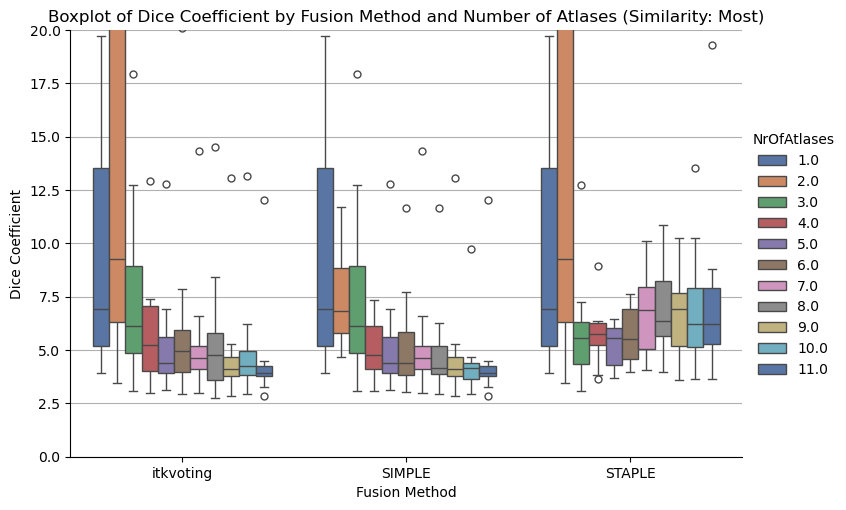

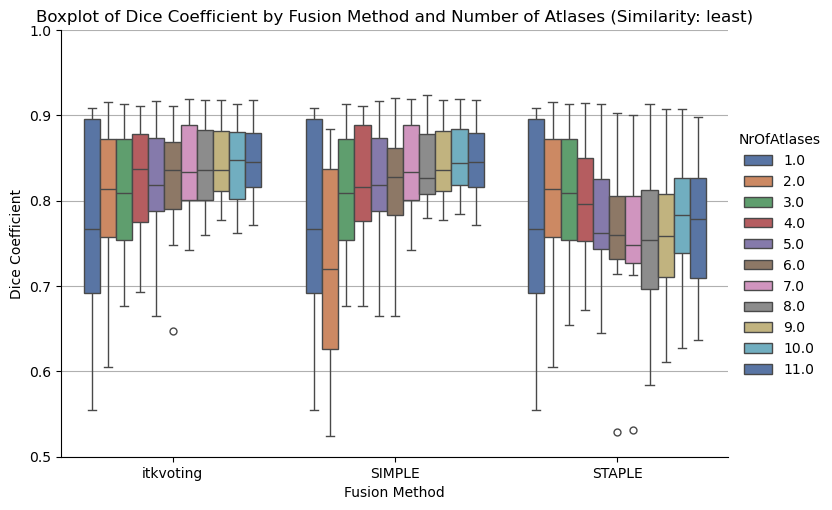

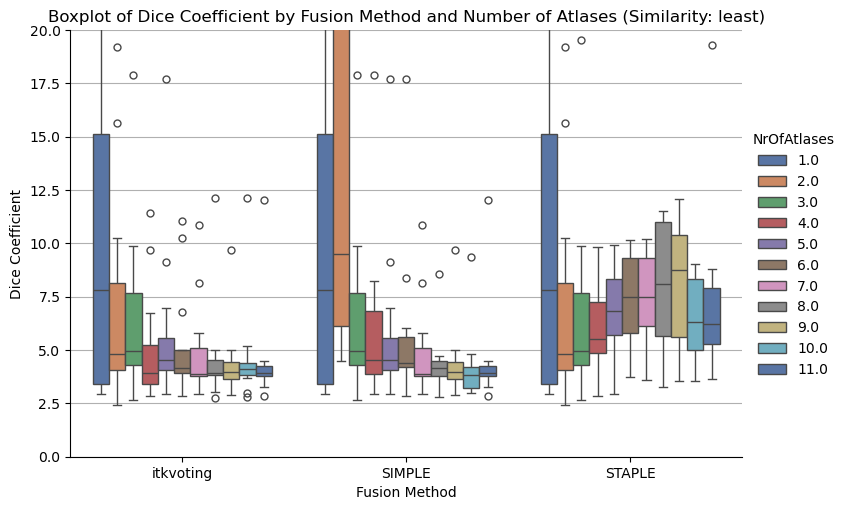

In [59]:
# NCC
sns.catplot(data=df_fusion_NCC[df_fusion_NCC["similarity"] == "most"], x='fusion_method', y='dice',
            hue='NrOfAtlases', kind='box', height=5, aspect=1.5,
            palette='deep')
plt.title('Boxplot of Dice Coefficient by Fusion Method and Number of Atlases (Similarity: Most)')
plt.xlabel('Fusion Method')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0.5, 1)
plt.show()
sns.catplot(data=df_fusion_NCC[df_fusion_NCC["similarity"] == "most"], x='fusion_method', y='hd95',
            hue='NrOfAtlases', kind='box', height=5, aspect=1.5,
            palette='deep')
plt.title('Boxplot of Dice Coefficient by Fusion Method and Number of Atlases (Similarity: Most)')
plt.xlabel('Fusion Method')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0, 20)
plt.show()
sns.catplot(data=df_fusion_NCC[df_fusion_NCC["similarity"] == "least"], x='fusion_method', y='dice',
            hue='NrOfAtlases', kind='box', height=5, aspect=1.5,
            palette='deep')
plt.title('Boxplot of Dice Coefficient by Fusion Method and Number of Atlases (Similarity: least)')
plt.xlabel('Fusion Method')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0.5, 1)
plt.show()
sns.catplot(data=df_fusion_NCC[df_fusion_NCC["similarity"] == "least"], x='fusion_method', y='hd95',
            hue='NrOfAtlases', kind='box', height=5, aspect=1.5,
            palette='deep')
plt.title('Boxplot of Dice Coefficient by Fusion Method and Number of Atlases (Similarity: least)')
plt.xlabel('Fusion Method')
plt.ylabel('Dice Coefficient')
plt.grid(axis='y')
plt.ylim(0, 20)
plt.show()

In [60]:
summary_table = df_fusion_MI.groupby(['fusion_method', 'NrOfAtlases', 'similarity'])[
    'dice'].describe()
summary_table_sorted = summary_table.sort_values(by='mean', ascending=False)
# summary_table_sorted.head(10)

summary_table_sorted = summary_table_sorted.pivot_table(index=['fusion_method', 'NrOfAtlases'], columns='similarity', values=['mean', 'std'])
summary_table_sorted = summary_table_sorted  # .round(2)
summary_table_sorted

mean                 std          
similarity                    least      most     least      most
fusion_method NrOfAtlases                                        
SIMPLE        1.0          0.753518  0.741488  0.123694  0.106371
              2.0          0.705096  0.729828  0.128297  0.141690
              3.0          0.800375  0.695359  0.078805  0.226643
              4.0          0.812281  0.810441  0.073165  0.065643
              5.0          0.818858  0.816701  0.077883  0.059870
              6.0          0.823612  0.821714  0.069630  0.061730
              7.0          0.829255  0.819762  0.068044  0.057404
              8.0          0.834925  0.833933  0.067725  0.059888
              9.0          0.835732  0.834678  0.061765  0.053830
              10.0         0.837631  0.835481  0.063145  0.060429
              11.0         0.838267  0.838267  0.057872  0.057872
STAPLE        1.0          0.753518  0.741488  0.123694  0.106371
              2.0          0.793487  0.560423  0.082666  0.284445
              3.0          0.801530  0.709859  0.077442  0.237475
              4.0          0.793543  0.792852  0.084430  0.096743
              5.0          0.765946  0.801763  0.108601  0.097078
              6.0          0.743477  0.770427  0.127907  0.140271
              7.0          0.744292  0.760033  0.127712  0.145144
              8.0          0.763015  0.753752  0.106582  0.142645
              9.0          0.756270  0.758221  0.137023  0.131859
              10.0         0.754284  0.764504  0.140139  0.133007
              11.0         0.746086  0.746086  0.147986  0.147986
itkvoting     1.0          0.753518  0.741488  0.123694  0.106371
              2.0          0.793487  0.560423  0.082666  0.284445
              3.0          0.800375  0.695359  0.078805  0.226643
              4.0          0.818307  0.706719  0.071149  0.227010
              5.0          0.818858  0.816701  0.077883  0.059870
              6.0          0.817955  0.786368  0.060196  0.072013
              7.0          0.829255  0.819762  0.068044  0.057404
              8.0          0.831089  0.814717  0.063617  0.050510
              9.0          0.835732  0.834678  0.061765  0.053830
              10.0         0.834641  0.830816  0.057618  0.053852
              11.0         0.838267  0.838267  0.057872  0.057872

In [61]:
summary_table = df_fusion_NCC.groupby(['fusion_method', 'NrOfAtlases', 'similarity'])[
    'dice'].describe()
summary_table_sorted = summary_table.sort_values(by='mean', ascending=False)
# summary_table_sorted.head(10)

summary_table_sorted = summary_table_sorted.pivot_table(
    index=['fusion_method', 'NrOfAtlases'], columns='similarity', values=['mean', 'std'])
summary_table_sorted = summary_table_sorted  # .round(2)
summary_table_sorted

mean                 std          
similarity                    least      most     least      most
fusion_method NrOfAtlases                                        
SIMPLE        1.0          0.768266  0.715432  0.115874  0.142801
              2.0          0.717593  0.744155  0.126832  0.122715
              3.0          0.809239  0.760199  0.073260  0.128979
              4.0          0.819186  0.816839  0.072706  0.055593
              5.0          0.822237  0.830929  0.070348  0.045436
              6.0          0.824039  0.833711  0.069669  0.048294
              7.0          0.836908  0.831140  0.058023  0.048009
              8.0          0.844391  0.838314  0.049058  0.045537
              9.0          0.845794  0.842178  0.048235  0.044956
              10.0         0.850461  0.846718  0.046417  0.042500
              11.0         0.848136  0.848136  0.046609  0.046609
STAPLE        1.0          0.768266  0.715432  0.115874  0.142801
              2.0          0.801692  0.631034  0.093376  0.236860
              3.0          0.807435  0.784940  0.077194  0.124258
              4.0          0.801014  0.789087  0.068703  0.111487
              5.0          0.782651  0.793851  0.073430  0.111345
              6.0          0.762531  0.779156  0.095197  0.110831
              7.0          0.758999  0.764514  0.094092  0.112631
              8.0          0.758713  0.782552  0.091775  0.070132
              9.0          0.761013  0.780158  0.090134  0.074845
              10.0         0.779745  0.778784  0.082719  0.079406
              11.0         0.755081  0.755081  0.122826  0.122826
itkvoting     1.0          0.768266  0.715432  0.115874  0.142801
              2.0          0.801692  0.631034  0.093376  0.236860
              3.0          0.809239  0.760199  0.073260  0.128979
              4.0          0.825132  0.782839  0.071960  0.100252
              5.0          0.822237  0.830929  0.070348  0.045436
              6.0          0.822248  0.796997  0.073907  0.084221
              7.0          0.836908  0.831140  0.058023  0.048009
              8.0          0.839939  0.831014  0.055452  0.045875
              9.0          0.845794  0.842178  0.048235  0.044956
              10.0         0.843375  0.840510  0.049857  0.046090
              11.0         0.848136  0.848136  0.046609  0.046609

In [87]:
summary_fusion_MI = df_fusion_MI.groupby(['fusion_method', 'NrOfAtlases', 'similarity'])[
    'dice'].describe()
summary_fusion_MI = summary_fusion_MI.sort_values(by='mean', ascending=False)
summary_fusion_MI.head(20)
# summary_fusion_MI_itkvoting = summary_fusion_MI[summary_fusion_MI['fusion_method'] == 'itkvoting']
# summary_fusion_MI_itkvoting.head(10)

count      mean       std       min  \
fusion_method NrOfAtlases similarity                                        
itkvoting     11.0        most         12.0  0.838267  0.057872  0.750212   
                          least        12.0  0.838267  0.057872  0.750212   
SIMPLE        11.0        most         12.0  0.838267  0.057872  0.750212   
                          least        12.0  0.838267  0.057872  0.750212   
              10.0        least        12.0  0.837631  0.063145  0.745133   
              9.0         least        12.0  0.835732  0.061765  0.754785   
itkvoting     9.0         least        12.0  0.835732  0.061765  0.754785   
SIMPLE        10.0        most         12.0  0.835481  0.060429  0.723858   
              8.0         least        12.0  0.834925  0.067725  0.735638   
itkvoting     9.0         most         12.0  0.834678  0.053830  0.733824   
SIMPLE        9.0         most         12.0  0.834678  0.053830  0.733824   
itkvoting     10.0        least        12.0  0.834641  0.057618  0.743637   
SIMPLE        8.0         most         12.0  0.833933  0.059888  0.709833   
itkvoting     8.0         least        12.0  0.831089  0.063617  0.743535   
              10.0        most         12.0  0.830816  0.053852  0.724422   
SIMPLE        7.0         least        12.0  0.829255  0.068044  0.725945   
itkvoting     7.0         least        12.0  0.829255  0.068044  0.725945   
SIMPLE        6.0         least        12.0  0.823612  0.069630  0.725246   
                          most         12.0  0.821714  0.061730  0.702890   
              7.0         most         12.0  0.819762  0.057404  0.707953   

                                           25%       50%       75%       max  
fusion_method NrOfAtlases similarity                                          
itkvoting     11.0        most        0.787361  0.834587  0.888541  0.915201  
                          least       0.787361  0.834587  0.888541  0.915201  
SIMPLE        11.0        most        0.787361  0.834587  0.888541  0.915201  
                          least       0.787361  0.834587  0.888541  0.915201  
              10.0        least       0.788521  0.831420  0.900463  0.921186  
              9.0         least       0.786690  0.822836  0.889453  0.921186  
itkvoting     9.0         least       0.786690  0.822836  0.889453  0.921186  
SIMPLE        10.0        most        0.783771  0.844554  0.879396  0.915394  
              8.0         least       0.789098  0.818780  0.899856  0.922672  
itkvoting     9.0         most        0.792112  0.842778  0.877131  0.905845  
SIMPLE        9.0         most        0.792112  0.842778  0.877131  0.905845  
itkvoting     10.0        least       0.790588  0.831486  0.889110  0.909202  
SIMPLE        8.0         most        0.792292  0.845886  0.872221  0.905777  
itkvoting     8.0         least       0.785441  0.816151  0.887180  0.919095  
              10.0        most        0.789254  0.836186  0.865088  0.902926  
SIMPLE        7.0         least       0.776746  0.821695  0.897572  0.920828  
itkvoting     7.0         least       0.776746  0.821695  0.897572  0.920828  
SIMPLE        6.0         least       0.776091  0.801096  0.890680  0.915891  
                          most        0.773770  0.826435  0.866158  0.913280  
              7.0         most        0.786438  0.832577  0.855306  0.906228

In [79]:
summary_fusion_NCC = df_fusion_NCC.groupby(['fusion_method', 'NrOfAtlases', 'similarity'])[
    'dice'].describe()
summary_fusion_NCC = summary_fusion_NCC.sort_values(by='mean', ascending=False)
summary_fusion_NCC.head(10)

count      mean       std       min  \
fusion_method NrOfAtlases similarity                                        
SIMPLE        10.0        least        12.0  0.850461  0.046417  0.784430   
itkvoting     11.0        most         12.0  0.848136  0.046609  0.771644   
                          least        12.0  0.848136  0.046609  0.771644   
SIMPLE        11.0        most         12.0  0.848136  0.046609  0.771644   
                          least        12.0  0.848136  0.046609  0.771644   
              10.0        most         12.0  0.846718  0.042500  0.781861   
itkvoting     9.0         least        12.0  0.845794  0.048235  0.777982   
SIMPLE        9.0         least        12.0  0.845794  0.048235  0.777982   
              8.0         least        12.0  0.844391  0.049058  0.779540   
itkvoting     10.0        least        12.0  0.843375  0.049857  0.762274   

                                           25%       50%       75%       max  
fusion_method NrOfAtlases similarity                                          
SIMPLE        10.0        least       0.819057  0.844670  0.883559  0.918813  
itkvoting     11.0        most        0.815797  0.845196  0.879810  0.917866  
                          least       0.815797  0.845196  0.879810  0.917866  
SIMPLE        11.0        most        0.815797  0.845196  0.879810  0.917866  
                          least       0.815797  0.845196  0.879810  0.917866  
              10.0        most        0.817258  0.850771  0.867211  0.917292  
itkvoting     9.0         least       0.811372  0.835823  0.882265  0.918596  
SIMPLE        9.0         least       0.811372  0.835823  0.882265  0.918596  
              8.0         least       0.807417  0.827004  0.878756  0.923663  
itkvoting     10.0        least       0.801599  0.848162  0.880644  0.913373

In [77]:
summary_fusion2_2 = summary_fusion2.pivot_table(
    index=['fusion_method', 'similarity'], columns='NrOfAtlases', values=['mean'])
summary_fusion2_2 = summary_fusion2_2.round(3)
summary_fusion2_2

mean                                            \
NrOfAtlases                1.0    2.0    3.0    4.0    5.0    6.0    7.0    
fusion_method similarity                                                    
SIMPLE        least       0.768  0.718  0.809  0.819  0.822  0.824  0.837   
              most        0.715  0.744  0.760  0.817  0.831  0.834  0.831   
STAPLE        least       0.768  0.802  0.807  0.801  0.783  0.763  0.759   
              most        0.715  0.631  0.785  0.789  0.794  0.779  0.765   
itkvoting     least       0.768  0.802  0.809  0.825  0.822  0.822  0.837   
              most        0.715  0.631  0.760  0.783  0.831  0.797  0.831   

                                                      
NrOfAtlases                8.0    9.0    10.0   11.0  
fusion_method similarity                              
SIMPLE        least       0.844  0.846  0.850  0.848  
              most        0.838  0.842  0.847  0.848  
STAPLE        least       0.759  0.761  0.780  0.755  
              most        0.783  0.780  0.779  0.755  
itkvoting     least       0.840  0.846  0.843  0.848  
              most        0.831  0.842  0.841  0.848

In [68]:
summary_table_modified_latex = summary_fusion2.to_latex(
    column_format='cccccc', multirow=True, multicolumn_format='c')
print(summary_table_modified_latex)

\begin{tabular}{cccccc}
\toprule
 &  & \multicolumn{11}{c}{mean} & \multicolumn{11}{c}{std} \\
 & NrOfAtlases & 1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 & 6.000000 & 7.000000 & 8.000000 & 9.000000 & 10.000000 & 11.000000 & 1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 & 6.000000 & 7.000000 & 8.000000 & 9.000000 & 10.000000 & 11.000000 \\
fusion_method & similarity &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{SIMPLE} & least & 0.768266 & 0.717593 & 0.809239 & 0.819186 & 0.822237 & 0.824039 & 0.836908 & 0.844391 & 0.845794 & 0.850461 & 0.848136 & 0.115874 & 0.126832 & 0.073260 & 0.072706 & 0.070348 & 0.069669 & 0.058023 & 0.049058 & 0.048235 & 0.046417 & 0.046609 \\
 & most & 0.715432 & 0.744155 & 0.760199 & 0.816839 & 0.830929 & 0.833711 & 0.831140 & 0.838314 & 0.842178 & 0.846718 & 0.848136 & 0.142801 & 0.122715 & 0.128979 & 0.055593 & 0.045436 & 0.048294 & 0.048009 & 0.045537 & 0.044956 & 0.042500 & 0.046609 \\
\cl

# Validation

In [90]:
df_val = pd.read_csv("result_tables/validation_results_CC.csv")
df_val['parameter_file'] = df_val['parameter_file'].str.replace(
    '.txt', '').str.replace('Par0001', '')
fused_atlas_rows = df_val[df_val['atlas'] == 'fused_atlas']
# df_val
fused_atlas_rows

,parameter_file,fusion_method,target,atlas,dice,hd,hd95,recall,fpr,fnr,NrOfAtlases
10,"['translation_CC', 'bspline16_CC']",SIMPLE,p135,fused_atlas,0.736277,14.169275,4.738953,0.632719,0.002643,0.367281,10.0
21,"['translation_CC', 'bspline16_CC']",SIMPLE,p133,fused_atlas,0.821495,8.369099,3.521048,0.877786,0.007329,0.122214,10.0
32,"['translation_CC', 'bspline16_CC']",SIMPLE,p129,fused_atlas,0.905031,9.649220,3.126524,0.983161,0.015306,0.016839,10.0


In [94]:
# Compute the mean of numerical columns
mean_row = fused_atlas_rows[['dice', 'hd', 'hd95', 'recall', 'fpr', 'fnr']].mean()
mean_row
# Append the mean row to fused_atlas_rows
# fused_atlas_rows_with_mean = fused_atlas_rows.append(mean_row, ignore_index=True)

# Print the fused_atlas_rows_with_mean DataFrame
# print(fused_atlas_rows_with_mean)

dice       0.820935
hd        10.729198
hd95       3.795508
recall     0.831222
fpr        0.008426
fnr        0.168778
dtype: float64

In [95]:
(0.72+0.83+0.80+0.72+0.86)/5

0.7859999999999998